In [40]:
import numpy as np
import pickle
import torch
import torchvision
import matplotlib.patches as mpatches
import json

import pylab as plt
plt.rc('text', usetex=True)
plt.rc('font', size=30,family='serif')
# plt.style.use('matplotlibrc')
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline


In [50]:
!pwd

/Users/km/owncloud/Projects Neuro/RtDeel simulations/generalized_latent_equilibrium/experiments/MNIST_AUTOENCODER/Fig5


In [41]:
linclass_folders = ['BP/', 'FA/', 'DFA/', 'PAL/']
model_labels = ['BP', 'FA', 'DFA', 'PAL']

In [49]:
# determine learning rates with highest linear classification accuracy

winning_lrs = []

for model, folder in zip(model_labels, linclass_folders):
    with open(folder + '/lin_acc_lr_seeds_epochs.npy', 'rb') as input:
        lin_acc_lr_seeds_epochs = np.load(input)
        mean_arr = np.mean(lin_acc_lr_seeds_epochs[:,:,-1], axis=1)
        with open(folder + '/runs/lr' + str(mean_arr.argmax()) + '/seed0/params.json', 'r+') as f:
            params = json.load(f)
        print("model: " + model + " lr" + str(mean_arr.argmax()), mean_arr.max(), params['lr_factors'])
        winning_lrs.append(mean_arr.argmax())
        print(lin_acc_lr_seeds_epochs.shape)

model: BP lr15 0.3973758012820513 [0.01, 0.01, 0.01, 0.01]
(16, 10, 11)
model: FA lr0 0.2121494391025641 [0.001, 0.001, 0.001, 0.001]
(16, 10, 11)
model: DFA lr0 0.21007612179487176 [0.001, 0.001, 0.001, 0.001]
(4, 10, 11)
model: PAL lr14 0.35260416666666666 [0.01, 0.01, 0.01, 0.001]
(16, 10, 11)


In [45]:
for model, folder in zip(model_labels, linclass_folders):
    with open(folder + '/lin_acc_lr_seeds_epochs.npy', 'rb') as input:
        lin_acc_lr_seeds_epochs = np.load(input)
        mean_arr = np.mean(lin_acc_lr_seeds_epochs[:,:,-1], axis=1)
        for i in range(8):
            with open(folder + '/runs/lr' + str(i) + '/seed0/params.json', 'r+') as f:
                params = json.load(f)
            print("model: " + model + " lr" + str(i) , mean_arr[i], params['lr_factors'])

model: BP lr0 0.3520332532051282 [0.001, 0.001, 0.001, 0.001]
model: BP lr1 0.3866386217948718 [0.001, 0.001, 0.001, 0.01]
model: BP lr2 0.37019230769230765 [0.001, 0.001, 0.01, 0.001]
model: BP lr3 0.39173677884615377 [0.001, 0.001, 0.01, 0.01]
model: BP lr4 0.3519030448717949 [0.001, 0.01, 0.001, 0.001]
model: BP lr5 0.37938701923076923 [0.001, 0.01, 0.001, 0.01]
model: BP lr6 0.3646534455128205 [0.001, 0.01, 0.01, 0.001]
model: BP lr7 0.39449118589743587 [0.001, 0.01, 0.01, 0.01]
model: FA lr0 0.2121494391025641 [0.001, 0.001, 0.001, 0.001]
model: FA lr1 0.20579927884615384 [0.001, 0.001, 0.001, 0.01]
model: FA lr2 0.20309495192307697 [0.001, 0.001, 0.01, 0.001]
model: FA lr3 0.20952524038461537 [0.001, 0.001, 0.01, 0.01]
model: FA lr4 0.1898036858974359 [0.001, 0.01, 0.001, 0.001]
model: FA lr5 0.18250200320512822 [0.001, 0.01, 0.001, 0.01]
model: FA lr6 0.164443108974359 [0.001, 0.01, 0.01, 0.001]
model: FA lr7 0.1659755608974359 [0.001, 0.01, 0.01, 0.01]
model: DFA lr0 0.21007612

IndexError: index 4 is out of bounds for axis 0 with size 4

# Plot lin acc of best lr for all models

In [46]:
lin_acc_seeds_epochs_per_model = []
for linclass_folder, winning_lr in zip(linclass_folders, winning_lrs):
     lin_acc_seeds_epochs_per_model.append(np.load(linclass_folder + 'lin_acc_lr_seeds_epochs.npy')[winning_lr])

BP 0.3973758012820513 0.016172530190882443
FA 0.2121494391025641 0.010895663156060557
DFA 0.2100761217948718 0.01057490450337914
PAL 0.35260416666666666 0.011962709315741693


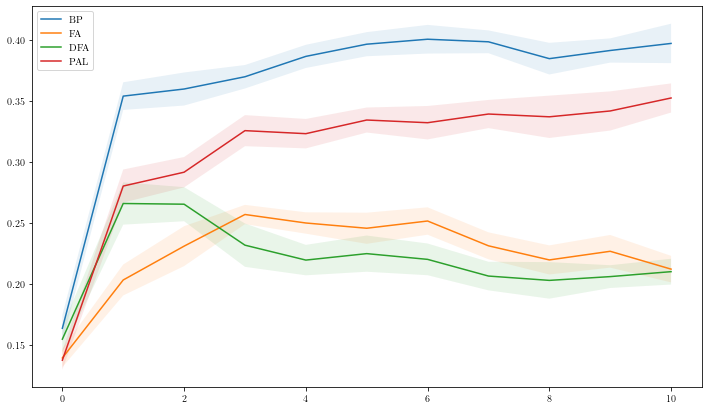

In [47]:
ax = plt.figure(figsize=(12,7))

for model_label, lin_acc_seeds_epochs in zip(model_labels, lin_acc_seeds_epochs_per_model):
    mean = np.mean(lin_acc_seeds_epochs,axis=0)
    std = np.std(lin_acc_seeds_epochs,axis=0) / np.sqrt(len(lin_acc_seeds_epochs)) # divide by number of runs because this is mean of means (seeds over test set)
    plt.plot(np.arange(len(mean)),mean, label=model_label)
    plt.fill_between(np.arange(len(mean)), mean+std, mean-std, alpha=.1)
    
    print(model_label, mean[-1], std[-1])

plt.legend()

plt.show()

# Angle between B and W.T for best lr with PAL

In [7]:
PATH = 'PAL/runs/lr6/'

with open(PATH_OUTPUT + "weights.pkl", "wb") as output:
    pickle.load(weights_time_series, output)

NameError: name 'PATH_OUTPUT' is not defined